<a href="https://colab.research.google.com/github/maschfederico/FruccioMasch/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get -qq install texlive-xetex
!apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1build1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1build1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2.1_all.deb ...
Unpacking fonts-lato (2.0-2.1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package tex-common.
Preparing to unpack .../03-tex-common_6.17_all.deb ...
Unpacking tex-common (6.17) ...
Selecting previously unselected package fonts-urw-base35.
Preparing to unpack .../04-fonts-urw-base35_20200910-1_all.deb ...
Unpacking fonts-urw-base35 (20200910-1) ...
Selecting previously unselected package libgs9-co

[50.78976767 50.19563726 50.08486187 50.04605879 50.02811709 50.01839884
 50.01256995 50.00881922 50.00628115 50.0044998  50.00321647 50.0022755
 50.0015787  50.00106162 50.00068055 50.000405   50.00021317 50.00008914
 50.00002107 50.         50.00001906 50.00007289 50.00015729 50.00026889
 50.000405   50.00056343 50.00074239 50.0009404  50.00115624 50.00138887
 50.00163744 50.00190121 50.00217957 50.00247198 50.00277798 50.00309719
 50.00342925 50.00377387 50.0041308  50.0044998  50.00488067 50.00527324
 50.00567734 50.00609285 50.00651964 50.00695759 50.00740661 50.0078666
 50.0083375  50.00881922 50.00931171 50.00981489 50.01032873 50.01085317
 50.01138817 50.01193368 50.01248967 50.01305611 50.01363296 50.0142202
 50.0148178  50.01542574 50.01604399 50.01667253 50.01731135 50.01796043
 50.01861975 50.01928929 50.01996904 50.020659   50.02135914 50.02206945
 50.02278993 50.02352056 50.02426134 50.02501225 50.02577329 50.02654445
 50.02732572 50.02811709 50.02891857 50.02973014 50.03

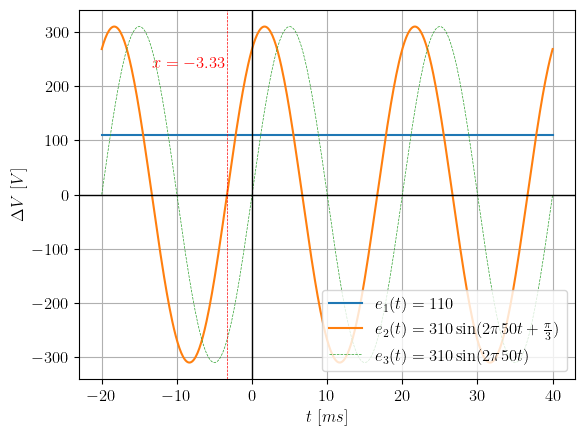

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
import cmath
from google.colab import files

# Relacion de aspecto
ra = 16/9  # Largo/Ancho
ancho_mm = 150
alto_mm = ancho_mm/ra
# Convertir milímetros a pulgadas
ancho_pulgadas = ancho_mm / 25.4
alto_pulgadas = alto_mm / 25.4

# Grafica de de impedancia en funcion dela frecuencia
# Rangos de frecuencia angular normalizado
rango_normalizado = np.arange(0.05, 10, 0.05)
# Valores de inductancia
L = 0.050
L_array = np.full(len(rango_normalizado), L)
# Valores de Capacitancia
C = 0.25
C_array = np.full(len(rango_normalizado), C)
# Valores de resistencia
R = 50
R_array = np.full(len(rango_normalizado), R)
# Frecuencia de resonancia
omega_resonante =  1/np.sqrt(L*C)
# Rango de frecuencias
omegas = omega_resonante*rango_normalizado
# Computo de impedancia
Z = R_array + 1j*(omegas*L_array-1/(omegas*C_array))
#Z = R_array
# Modulo de Z
ModuloZ = np.abs(Z)
print(ModuloZ)

n = 500
fase = 60*3.1416/180
frec_angular = 2*3.1416*0.050
x = np.linspace(-20,40,n)
# Fuente constante
y_1 = np.full(n,110)
# Fuente de tension alterna a 50 Hz y una fase positiva
y_2 = 220*1.41*np.sin(frec_angular*x + fase)
# Fuente de tesnion alterna a 50 Hz sin fase
y_3 = 220*1.41*np.sin(frec_angular*x)
# Configurar el modo de renderización de texto en LaTeX
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12
})
# Crear la gráfica
plt.plot(x, y_1,label=r'$e_1(t)= 110$')  # Crear la línea de la función sinusoidal
plt.plot(x, y_2,label=r'$e_2(t)= 310 \sin(2\pi 50 t + \frac{\pi}{3})$')  # Crear la línea de la función sinusoidal
plt.plot(x, y_3,label=r'$e_3(t)= 310 \sin(2\pi 50 t)$',linestyle='--',linewidth=0.5)  # Crear la línea de la función sinusoidal
plt.xlabel(r'$t\,\,[ms]$')  # Etiqueta del eje x
plt.ylabel(r'$\Delta V \,\,[V]$')  # Etiqueta del eje y

# Remarcar los ejes principales
plt.axhline(color='k', linewidth=1)  # Eje y
plt.axvline(color='k', linewidth=1)  # Eje x

xmin, xmax, ymin, ymax = plt.axis()

# Valor de corrimiento de fase en el dominio del tiempo
x_value = -fase/frec_angular

# Agregar una línea vertical para marcar la fase
plt.axvline(x=x_value, color='r', linestyle='--', linewidth=0.5)

# Colocar la leyenda cerca de la línea vertical
plt.text(x_value*1.1, ymax*0.75, r'$x = {}$'.format(round(x_value, 2)), ha='right', va='top', color='r')


#plt.title('Gráfica de la función sinusoidal')  # Título de la gráfica
plt.legend(loc='lower right')  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula
plt.show()  # Mostrar la gráfica





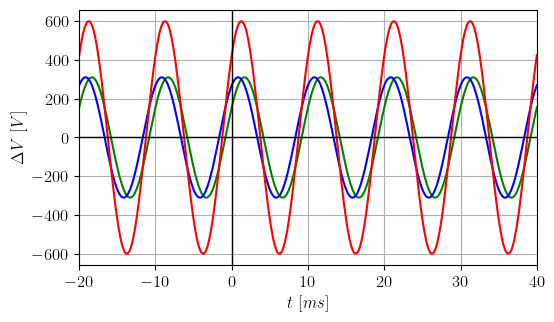

In [ ]:
# prompt: Quiero graficar el intervalo de tiempo entre 0 y los 80 ms las siguientes funciones: en verde $310\sin{2\pi 50 t + \frac{\pi}{6}}$, en azul $310\sin{2\pi 50 t + \frac{\pi}{3}}$ y en rojo la suma de estas dos

# Tamaño de la figura
plt.figure(figsize=(ancho_pulgadas, alto_pulgadas))

# Graficar las funciones
plt.plot(x, 310*np.sin(2*np.pi*50*x + np.pi/6), color='green', label=r'$310\sin(2\pi 50 t + \frac{\pi}{6})$')
plt.plot(x, 310*np.sin(2*np.pi*50*x + np.pi/3), color='blue', label=r'$310\sin(2\pi 50 t + \frac{\pi}{3})$')
plt.plot(x, 310*np.sin(2*np.pi*50*x + np.pi/6) + 310*np.sin(2*np.pi*50*x + np.pi/3), color='red', label=r'$598\sin(2\pi 50 t + \frac{\pi}{2}) = 310\sin(2\pi 50 t + \frac{\pi}{6}) + 310\sin(2\pi 50 t + \frac{\pi}{3})$')

# Establecer el intervalo del eje x
plt.xlim(-20, 40)

plt.xlabel(r'$t\,\,[ms]$')  # Etiqueta del eje x
plt.ylabel(r'$\Delta V \,\,[V]$')  # Etiqueta del eje y

# Remarcar los ejes principales
plt.axhline(color='k', linewidth=1)  # Eje y
plt.axvline(color='k', linewidth=1)  # Eje x

#plt.legend(loc='lower right')  # Mostrar la leyenda
plt.grid(True)  # Mostrar la cuadrícula
#plt.gca().set_aspect('equal', adjustable='box')  # Mantener la relación de aspecto
plt.show()  # Mostrar la gráfica


E1: 268.467875173176 154.99999999999997
E2: 155.00000000000003 268.46787517317597
E3: 423.467875173176 423.4678751731759
Módulo: 598.8740122992223


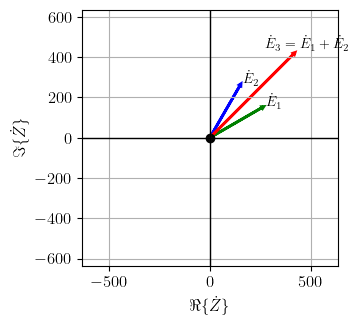

In [ ]:
# Grafica de Fasores
# Radio del círculo
radio = 310

# Coordenadas polares del vector
angulo_vector_1 = 30 * np.pi / 180
angulo_vector_2 = 60 * np.pi / 180  # Convertir a radianes

# Coordenadas de los fasores
x_vector_1 = radio * np.cos(angulo_vector_1)
y_vector_1 = radio * np.sin(angulo_vector_1)
print("E1:", x_vector_1, y_vector_1 )
x_vector_2 = radio * np.cos(angulo_vector_2)
y_vector_2 = radio * np.sin(angulo_vector_2)
print("E2:", x_vector_2, y_vector_2 )
# Coordenadas del faso suma resultante
x_vector_3 = x_vector_1 + x_vector_2
y_vector_3 = y_vector_1 + y_vector_2
print("E3:", x_vector_3, y_vector_3 )
# Crear el número complejo
E3 = complex(x_vector_3, y_vector_3)

# Calcular el módulo y la fase
moduloE3 = abs(E3)
print("Módulo:", moduloE3)
fase_rad = cmath.phase(E3)
anguloE3 = fase_rad * 180 / cmath.pi  # Convertir la fase a grados

# Largo de la flecha de los vectores
lengthArrow = 10
# Calcular el punto donde la flecha debe terminar en la circunferencia del círculo
x_flecha_1 = (radio-lengthArrow) * np.cos(angulo_vector_1)
y_flecha_1 = (radio-lengthArrow) * np.sin(angulo_vector_1)
x_flecha_2 = (radio-lengthArrow) * np.cos(angulo_vector_2)
y_flecha_2 = (radio-lengthArrow) * np.sin(angulo_vector_2)
x_flecha_3 = (moduloE3-lengthArrow) * np.cos(fase_rad)
y_flecha_3 = (moduloE3-lengthArrow) * np.sin(fase_rad)



# Crear el gráfico
plt.figure(figsize=(ancho_pulgadas, alto_pulgadas))  # Tamaño de la figura
plt.grid(True)  # Mostrar la cuadrícula

# Dibujar el círculo
#theta = np.linspace(0, 2*np.pi, 100)
#plt.plot(radio * np.cos(theta), radio * np.sin(theta), 'b-', label='Círculo')

# Dibujar el E1
plt.arrow(0, 0, x_flecha_1, y_flecha_1, head_width=10, head_length=lengthArrow, fc='green', ec='green', linestyle='-', linewidth=2, label='Vector 30°')

# Dibujar el E2
plt.arrow(0, 0, x_flecha_2, y_flecha_2, head_width=10, head_length=lengthArrow, fc='blue', ec='blue', linestyle='-', linewidth=2, label='Vector 30°')

# Dibujar el E3
plt.arrow(0, 0, x_flecha_3, y_flecha_3, head_width=10, head_length=lengthArrow, fc='red', ec='red', linestyle='-', linewidth=2, label='Vector 30°')

# Línea que indica el radio del círculo
#plt.plot([0, x_vector], [0, y_vector], 'r--')

# Remarcar los ejes principales
plt.axhline(color='k', linewidth=1)  # Eje y
plt.axvline(color='k', linewidth=1)  # Eje x

plt.scatter(0, 0, color='black')  # Punto del origen
plt.text(x_vector_1 + 10, y_vector_1, r'$\dot{E}_1$', fontsize=10)  # Etiqueta del vector
plt.text(x_vector_2 + 10, y_vector_2, r'$\dot{E}_2$', fontsize=10)  # Etiqueta del vector
plt.text(x_vector_3 -150, y_vector_3 + 20, r'$\dot{E}_{3} = \dot{E}_{1} + \dot{E}_{2}$', fontsize=10)  # Etiqueta del vector
escale = 1.5
plt.xlim(-escale*x_vector_3, escale*x_vector_3)  # Limitar los ejes
plt.ylim(-escale*x_vector_3, escale*x_vector_3)
plt.xlabel(r'$\Re{\{\dot{Z}\}}$')  # Etiqueta del eje x
plt.ylabel(r'$\Im{\{\dot{Z}\}}$')  # Etiqueta del eje y
plt.gca().set_aspect('equal', adjustable='box')  # Mantener la relación de aspecto
plt.show()  # Mostrar el gráfico

#plt.savefig(´"suma_de_fasores.png")
#files.download("suma_de_fasores.png")

Fasor Tension  E (Cartesiana): (155.00000000000003+268.46787517317597j)
Fasor Tension  E (Modulo,fase (rad)): 310 1.0471975511965976
Fasor Impedancia  Z (Cartesiana): (100-159.14080592495418j)
Fasor Impedancia  Z (Modulo,fase (rad)): 187.95157916453888 -1.0097741938481795
Fasor Corriente  I (Cartesiana): (-0.7706604526308324+1.4582434964701532j)
Fasor Corriente  I (Modulo,fase (rad)): 1.6493609757256467 2.056971745044777
Fasor Caida de tension Vr  (Cartesiana): (77.06604526308324-145.8243496470153j)
Fasor Caida de tension Vr (Modulo,fase (rad)): 164.93609757256465 -1.0846209085450162
Fasor Caida de tension Vc  (Cartesiana): (-232.08666069483368-122.65442048163442j)
Fasor Caida de tension Vc (Modulo,fase (rad)): 262.5039522296082 -2.655417235339913
Fasor Caida de tension Vl  (Cartesiana): (0.02061543175045077+0.010894955473787436j)
Fasor Caida de tension Vl (Modulo,fase (rad)): 0.02331729146005823 0.4861754182498805


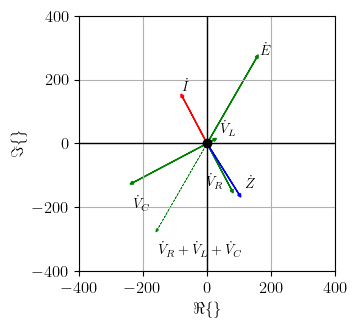

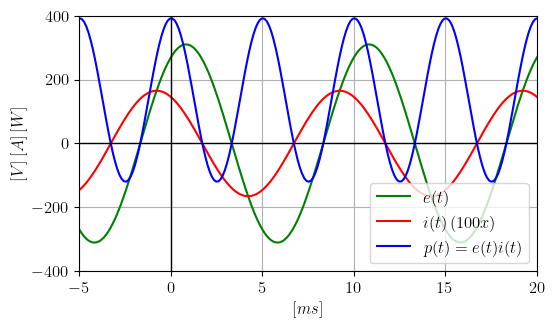

In [ ]:
## Circuito RLC
## Fuente de tensión alterna ideal
# Frecuencia de la fuente
frecuencia =  50
omega = 2*np.pi*frecuencia
fase_fuente = np.pi/3
Valor_maximo_fuente = 310
# Fasor asociado
E =  complex(Valor_maximo_fuente*cmath.cos(fase_fuente),Valor_maximo_fuente*cmath.sin(fase_fuente))
print("Fasor Tension  E (Cartesiana):", E)
print("Fasor Tension  E (Modulo,fase (rad)):",Valor_maximo_fuente,fase_fuente)
## Impedancia Z
# Resistencia
R = 100
# Inductor
L = 45E-6
# Capacitor
C = 20E-6
# Reactancia
X = omega*L- 1/(omega*C)
# Impedancia compleja
Z = complex(R,X)
print("Fasor Impedancia  Z (Cartesiana):", Z)
print("Fasor Impedancia  Z (Modulo,fase (rad)):",abs(Z),cmath.phase(Z))
## Computo del fasor de corriente
# Fasor de corriente
I =  E/Z
print("Fasor Corriente  I (Cartesiana):", I)
print("Fasor Corriente  I (Modulo,fase (rad)):",abs(I),cmath.phase(I))
# Caidas de tension
# Fasor de Tension sobre resitencia
Vr = -1*R*I
print("Fasor Caida de tension Vr  (Cartesiana):", Vr)
print("Fasor Caida de tension Vr (Modulo,fase (rad)):",abs(Vr),cmath.phase(Vr))
# Fasor de Tension sobre capacitor
Vc = (1/(omega*C))*complex(0,1)*I
print("Fasor Caida de tension Vc  (Cartesiana):", Vc)
print("Fasor Caida de tension Vc (Modulo,fase (rad)):",abs(Vc),cmath.phase(Vc))
# Fasor de Tension sobre inductor
Vl = -1*omega*L*complex(0,1)*I
print("Fasor Caida de tension Vl  (Cartesiana):", Vl)
print("Fasor Caida de tension Vl (Modulo,fase (rad)):",abs(Vl),cmath.phase(Vl))


## Generacion de graficos de fasores
# Crear el gráfico
plt.figure(figsize=(ancho_pulgadas, alto_pulgadas))  # Tamaño de la figura
plt.grid(True)  # Mostrar la cuadrícula

# Dibujar el Fasor E
plt.arrow(0, 0, E.real, E.imag, head_width=10, head_length=10, fc='green', ec='green', linestyle='-', linewidth=1)
plt.text(E.real+10, E.imag+10, r'$\dot{E}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor I
escale= 100
plt.arrow(0, 0, escale*I.real, escale*I.imag, head_width=10, head_length=10, fc='red', ec='red', linestyle='-', linewidth=1)
plt.text(escale*(I.real), escale*(I.imag)+20, r'$\dot{I}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor Vr
escale= 1
v =  Vr
plt.arrow(0, 0, escale*v.real, escale*v.imag, head_width=10, head_length=10, fc='green', ec='green', linestyle='-', linewidth=1)
plt.text(escale*(v.real)-80, escale*(v.imag)+10, r'$\dot{V}_{R}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor Vc
escale= 1
v =  Vc
plt.arrow(0, 0, escale*v.real, escale*v.imag, head_width=10, head_length=10, fc='green', ec='green', linestyle='-', linewidth=1)
plt.text(escale*(v.real), escale*(v.imag)-80, r'$\dot{V}_{C}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor VL
escale= 1000
v =  Vl
plt.arrow(0, 0, escale*v.real, escale*v.imag, head_width=10, head_length=10, fc='green', ec='green', linestyle='-', linewidth=1)
plt.text(escale*(v.real)+ 20, escale*(v.imag)+20, r'$\dot{V}_{L}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor VL + Vc + Vr
escale= 1
v =  Vl + Vr + Vc
plt.arrow(0, 0, escale*v.real, escale*v.imag, head_width=10, head_length=10, fc='green', ec='green', linestyle='--', linewidth=0.5)
plt.text(escale*(v.real), escale*(v.imag)-80, r'$\dot{V}_{R}+ \dot{V}_{L} + \dot{V}_{C}$', fontsize=10)  # Etiqueta del vector

# Dibujar el Fasor Z
escale= 1
v =  Z
plt.arrow(0, 0, escale*v.real, escale*v.imag, head_width=10, head_length=10, fc='blue', ec='blue', linestyle='-', linewidth=1)
plt.text(escale*(v.real)+ 20, escale*(v.imag)+20, r'$\dot{Z}$', fontsize=10)  # Etiqueta del vector

# Remarcar los ejes principales
plt.axhline(color='k', linewidth=1)  # Eje y
plt.axvline(color='k', linewidth=1)  # Eje x
plt.scatter(0, 0, color='black')  # Punto del origen
escale = 1
tam = 400
plt.xlim(-escale*tam, escale*tam)  # Limitar los ejes
plt.ylim(-escale*tam, escale*tam)
plt.xlabel(r'$\Re\{\}$')  # Etiqueta del eje x
plt.ylabel(r'$\Im\{\}$')  # Etiqueta del eje y
plt.gca().set_aspect('equal', adjustable='box')  # Mantener la relación de aspecto
plt.show()  # Mostrar el gráfico


## Grafico temporal

# Crear la gráfica
# Crear el gráfico
plt.figure(figsize=(ancho_pulgadas, alto_pulgadas))  # Tamaño de la figura
plt.grid(True)  # Mostrar la cuadrícula

# Tension de la fuente
plt.plot(x, Valor_maximo_fuente*np.sin(2*np.pi*frecuencia*x + fase_fuente), color='green' ,label=r'$e(t)$')
# Corriente
plt.plot(x, 100*abs(I)*np.sin(2*np.pi*frecuencia*x + cmath.phase(I)), color='red',label=r'$i(t)\,(100x)$')  # Crear la línea de la función sinusoidal
# Potencia instantanea entregada por la fuente
plt.plot(x, Valor_maximo_fuente*np.sin(2*np.pi*frecuencia*x + fase_fuente)*abs(I)*np.sin(2*np.pi*frecuencia*x + cmath.phase(I)), color='blue',label=r'$p(t)=e(t)i(t)$')  # Crear la línea de la función sinusoidal

# Remarcar los ejes principales
plt.axhline(color='k', linewidth=1)  # Eje y
plt.axvline(color='k', linewidth=1)  # Eje x
#plt.scatter(0, 0, color='black')  # Punto del origen
escale = 1
tam = 400
plt.xlim(-5, 20)  # Limitar los ejes
plt.ylim(-escale*tam, escale*tam)
plt.xlabel(r'$[ms]$')  # Etiqueta del eje x
plt.ylabel(r'$[V]\,[A]\,[W]$')  # Etiqueta del eje y
plt.legend(loc='lower right')  # Mostrar la leyenda
#plt.gca().set_aspect('equal', adjustable='box')  # Mantener la relación de aspecto
plt.show()  # Mostrar el gráfico
